In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [25]:
pwd

'C:\\Users\\rrrod\\FFC_4\\data\\obs_042424\\Phase1'

In [15]:
cd obs_042424

C:\Users\rrrod\FFC_4\data\obs_042424


In [40]:
cd ../

C:\Users\rrrod


In [41]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 1C83-5168

 Directory of C:\Users\rrrod

04/25/2024  12:30 PM    <DIR>          .
03/08/2023  06:22 PM    <DIR>          ..
02/05/2024  10:53 PM    <DIR>          .anaconda
02/26/2024  12:07 PM    <DIR>          .astropy
02/04/2024  05:31 PM    <DIR>          .CODING
02/24/2024  11:39 AM    <DIR>          .conda
10/18/2023  02:14 PM                25 .condarc
10/18/2023  02:14 PM    <DIR>          .continuum
01/29/2024  12:12 AM             6,148 .DS_Store
02/04/2024  09:28 PM               173 .gitconfig
02/28/2023  03:12 PM    <DIR>          .idlerc
03/01/2024  09:41 PM    <DIR>          .ipynb_checkpoints
01/29/2023  01:22 PM    <DIR>          .ipython
02/05/2024  02:00 PM    <DIR>          .jupyter
02/17/2024  02:54 PM                20 .lesshst
04/25/2024  12:30 PM    <DIR>          .local
02/04/2024  07:56 PM    <DIR>          .matplotlib
04/06/2024  05:45 PM    <DIR>          .ssh
04/25/2024  12:12 AM            10,652 .

In [45]:
path1 = "FFC_4/data/obs_042424/Phase1"

spec_files = os.listdir(path1)

print("Files and directories in '", path1, "' :")
print(spec_files) # sanity check


Files and directories in ' FFC_4/data/obs_042424/Phase1 ' :
['spec100_L180_B54.npz', 'spec101_L161_B51.npz', 'spec102_L175_B54.npz', 'spec103_L134_B37.npz', 'spec104_L138_B40.npz', 'spec105_L170_B54.npz', 'spec106_L143_B44.npz', 'spec107_L157_B51.npz', 'spec109_L166_B54.npz', 'spec10_L138_B23.npz', 'spec110_L147_B47.npz', 'spec111_L180_B57.npz', 'spec112_L161_B54.npz', 'spec113_L175_B57.npz', 'spec114_L152_B51.npz', 'spec115_L170_B57.npz', 'spec116_L157_B54.npz', 'spec117_L166_B57.npz', 'spec118_L143_B47.npz', 'spec119_L138_B44.npz', 'spec11_L152_B20.npz', 'spec120_L147_B51.npz', 'spec121_L161_B57.npz', 'spec122_L134_B40.npz', 'spec123_L152_B54.npz', 'spec124_L157_B57.npz', 'spec125_L143_B51.npz', 'spec126_L147_B54.npz', 'spec127_L138_B47.npz', 'spec128_L152_B57.npz', 'spec12_L143_B23.npz', 'spec130_L134_B44.npz', 'spec131_L143_B54.npz', 'spec132_L147_B57.npz', 'spec134_L138_B51.npz', 'spec135_L134_B47.npz', 'spec136_L143_B57.npz', 'spec138_L138_B54.npz', 'spec139_L134_B51.npz', 'spec1

In [47]:
def loader(mix_arrays, directory):
    data = {}  # Dictionary to store loaded data
    data_array = [] # array to store each set of data  
    
    for file_name in mix_arrays:
        file_path = os.path.join(directory, file_name)  # Full path to the file
        dataload = np.load(file_path)
        data[file_name] = dataload  # Store the loaded data in the dictionary
        data_array.append(dataload['data0'])  # Append the loaded data to data_array
        
    for idx, file_name in enumerate(mix_arrays):
        print("Index:", idx, "Filename:", file_name) # just prints it out so that you can refer to it to index certain files

    return np.array(data_array)

path1 = "FFC_4/data/obs_042424/Phase1"
specs = loader(spec_files, path1)


Index: 0 Filename: spec100_L180_B54.npz
Index: 1 Filename: spec101_L161_B51.npz
Index: 2 Filename: spec102_L175_B54.npz
Index: 3 Filename: spec103_L134_B37.npz
Index: 4 Filename: spec104_L138_B40.npz
Index: 5 Filename: spec105_L170_B54.npz
Index: 6 Filename: spec106_L143_B44.npz
Index: 7 Filename: spec107_L157_B51.npz
Index: 8 Filename: spec109_L166_B54.npz
Index: 9 Filename: spec10_L138_B23.npz
Index: 10 Filename: spec110_L147_B47.npz
Index: 11 Filename: spec111_L180_B57.npz
Index: 12 Filename: spec112_L161_B54.npz
Index: 13 Filename: spec113_L175_B57.npz
Index: 14 Filename: spec114_L152_B51.npz
Index: 15 Filename: spec115_L170_B57.npz
Index: 16 Filename: spec116_L157_B54.npz
Index: 17 Filename: spec117_L166_B57.npz
Index: 18 Filename: spec118_L143_B47.npz
Index: 19 Filename: spec119_L138_B44.npz
Index: 20 Filename: spec11_L152_B20.npz
Index: 21 Filename: spec120_L147_B51.npz
Index: 22 Filename: spec121_L161_B57.npz
Index: 23 Filename: spec122_L134_B40.npz
Index: 24 Filename: spec123_

In [49]:
# shifting
def shift(signal):
    return np.fft.fftshift(signal)

def power(signal):
    return np.abs(signal)**2

In [50]:
spec_fft = []
for i in range(len(specs)):
    # Assuming you want to take the Fourier transformation for indices 40:2008
    spec_ffts = shift(specs[i])
    spec_fft.append(spec_ffts)
    
print(np.shape(spec_fft))

(137, 2048)


In [75]:
# Define the frequency axis
sampling_rate = 3.2  # Sample rate in Hz
num_samples = 2048  # Number of samples
freqs = np.fft.fftshift(np.fft.fftfreq(num_samples, 1/sampling_rate))

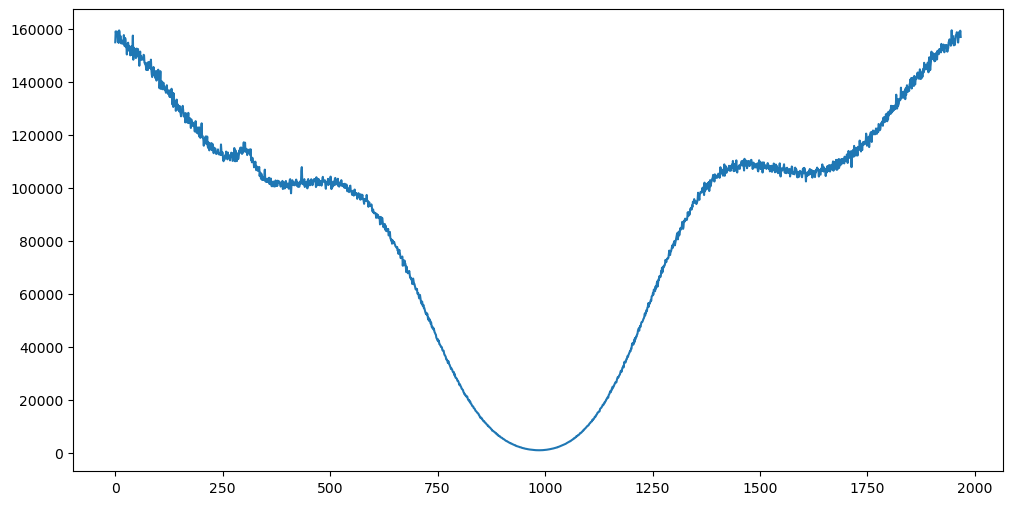

In [85]:
plt.figure(figsize=(12,6))
plt.plot(specs[i][40:2008])
plt.show()

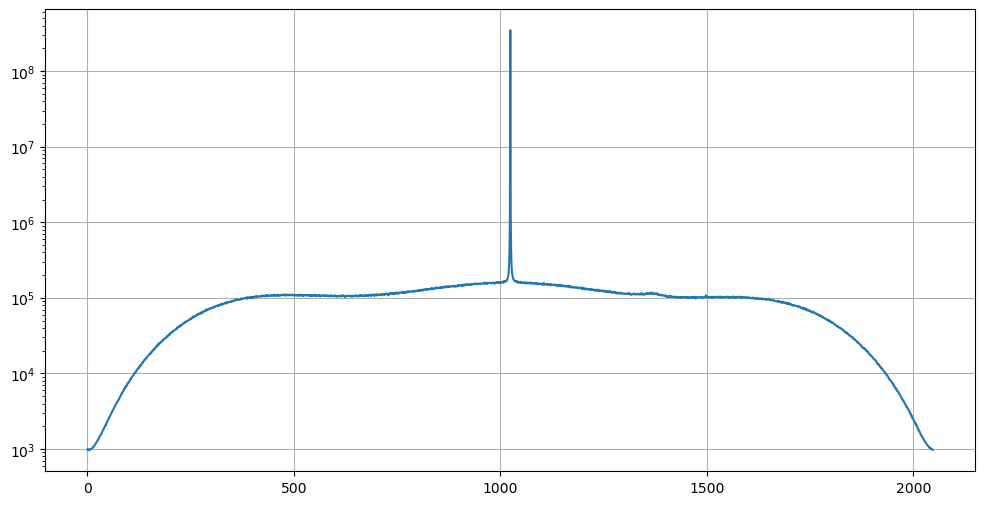

In [86]:
plt.figure(figsize=(12,6))
plt.semilogy(spec_fft[i])
plt.grid()
plt.show()

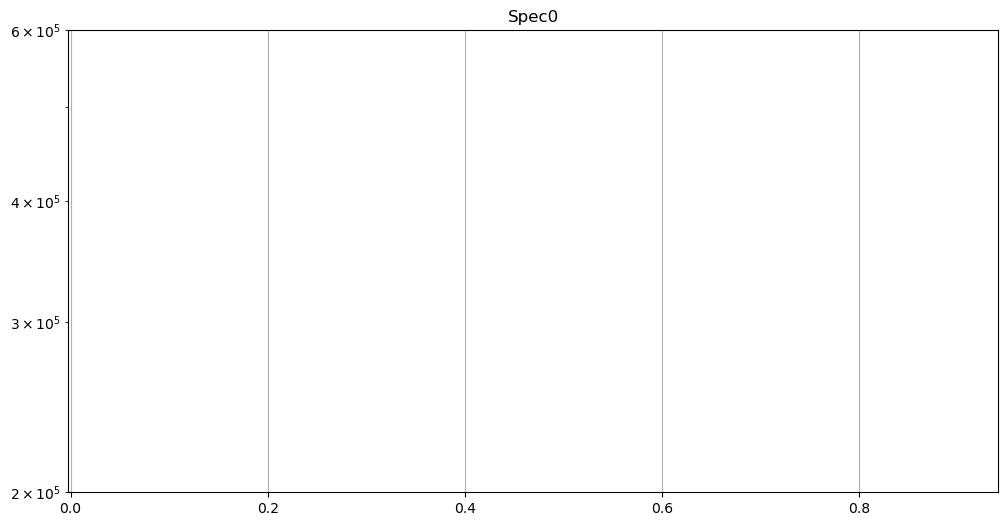

In [87]:
plt.figure(figsize=(12,6))
plt.semilogy(freqs[1050:1600], spec_fft[i][1050:1600])
plt.ylim(2e5,6e5)
plt.grid()
plt.title(f'Spec{i}')
plt.show()